In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
df = pd.read_csv('taxi-fare.csv')
df.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                500000 non-null  object 
 1   fare_amount        500000 non-null  float64
 2   pickup_datetime    500000 non-null  object 
 3   pickup_longitude   500000 non-null  float64
 4   pickup_latitude    500000 non-null  float64
 5   dropoff_longitude  499995 non-null  float64
 6   dropoff_latitude   499995 non-null  float64
 7   passenger_count    500000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 30.5+ MB


In [244]:
df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
dtype: int64

In [245]:
df.dropna(inplace=True)

In [246]:
df['passenger_count'].value_counts()

1    346009
2     73908
5     35322
3     21761
4     10614
6     10590
0      1791
Name: passenger_count, dtype: int64

In [247]:
df.corr()

/tmp/ipykernel_23016/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.008822,-0.007779,0.009233,-0.007865,0.013823
pickup_longitude,0.008822,1.000000,-0.522516,0.839781,-0.571343,-0.002501
pickup_latitude,-0.007779,-0.522516,1.000000,-0.604772,0.611882,0.001567
dropoff_longitude,0.009233,0.839781,-0.604772,1.000000,-0.484829,-0.001761
dropoff_latitude,-0.007865,-0.571343,0.611882,-0.484829,1.000000,0.001438
passenger_count,0.013823,-0.002501,0.001567,-0.001761,0.001438,1.000000


In [248]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-72.520091,39.920350,-72.522435,39.916526,1.683445
std,9.916069,11.856446,8.073318,11.797362,7.391002,1.307391
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992047,40.734916,-73.991382,40.734057,1.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


<Axes: ylabel='fare_amount'>

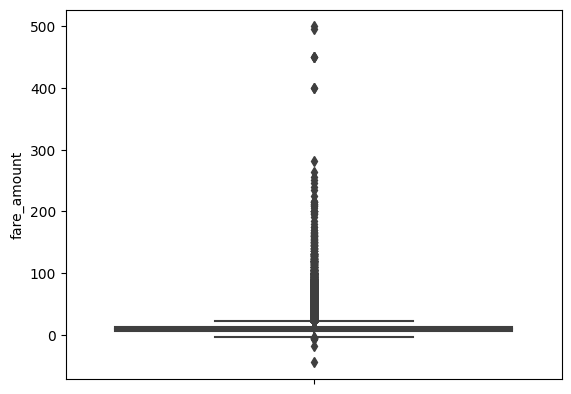

In [249]:
sns.boxplot(y = df['fare_amount'])

In [250]:
df2 = df[(df['fare_amount'] > 0) & (df['fare_amount'] <=160)]

In [251]:
df2['passenger_count'].value_counts()

1    345945
2     73896
5     35321
3     21758
4     10611
6     10589
0      1791
Name: passenger_count, dtype: int64

1st model - fare 0-160

2nd model - 160-300

3rd all data

4th 25% sample

In [252]:
df2[df2['passenger_count'] == 0].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.0
mean,8.964629,-72.738462,40.069210,-72.777412,40.092268,0.0
std,6.275889,9.496606,5.231404,9.339345,5.145007,0.0
min,2.500000,-74.031985,0.000000,-74.031987,0.000000,0.0
25%,5.300000,-73.991896,40.735658,-73.991600,40.734550,0.0
50%,7.300000,-73.981877,40.753567,-73.980195,40.753282,0.0
75%,10.500000,-73.968050,40.767477,-73.963800,40.769100,0.0
max,89.250000,0.000000,40.869400,0.000000,41.005684,0.0


In [253]:
df2['passenger_count'].replace(to_replace=0, value=1, inplace=True)

/tmp/ipykernel_23016/2429518419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['passenger_count'].replace(to_replace=0, value=1, inplace=True)


In [254]:
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

In [255]:
df3 = df2[(df2['pickup_longitude'] > nyc_min_longitude) & (df2['pickup_longitude'] < nyc_max_longitude )]
df3 = df3[(df3['pickup_latitude'] > nyc_min_latitude) & (df3['pickup_latitude'] < nyc_max_latitude )]

In [256]:
df3

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
499995,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12+00:00,-73.978775,40.766724,-73.966072,40.758537,1
499996,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34+00:00,-74.002932,40.718408,-74.009442,40.710952,1
499997,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20+00:00,-73.983885,40.725611,-73.896482,40.700980,1
499998,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32+00:00,-73.974617,40.756512,-73.970184,40.764801,6


In [257]:
df3['pickup_datetime']= pd.to_datetime(df3['pickup_datetime'])

In [258]:
df3['year'] = df3['pickup_datetime'].dt.year
df3['month'] = df3['pickup_datetime'].dt.month
df3['day'] = df3['pickup_datetime'].dt.day
df3['day of week'] = df3['pickup_datetime'].dt.day_of_week
df3['hour'] = df3['pickup_datetime'].dt.hour
df3.drop('pickup_datetime', axis=1, inplace=True)

In [259]:
df3

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day of week,hour
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2015-05-07 18:45:12.0000004,7.0,-73.978775,40.766724,-73.966072,40.758537,1,2015,5,7,3,18
499996,2010-09-13 12:11:34.0000004,13.7,-74.002932,40.718408,-74.009442,40.710952,1,2010,9,13,0,12
499997,2014-08-25 00:22:20.0000001,25.0,-73.983885,40.725611,-73.896482,40.700980,1,2014,8,25,0,0
499998,2015-01-12 12:17:32.0000001,6.5,-73.974617,40.756512,-73.970184,40.764801,6,2015,1,12,0,12


In [260]:
df3.corr()

/tmp/ipykernel_23016/3136175663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day of week,hour
fare_amount,1.000000,0.431605,-0.222877,0.009718,-0.013162,0.015990,0.120157,0.025585,0.001940,0.003444,-0.019087
pickup_longitude,0.431605,1.000000,-0.046625,0.010491,-0.009583,0.003377,0.013790,0.005305,0.000541,-0.023986,0.017627
pickup_latitude,-0.222877,-0.046625,1.000000,-0.002731,0.011872,-0.006963,-0.012782,-0.006774,-0.001504,-0.040866,0.030015
dropoff_longitude,0.009718,0.010491,-0.002731,1.000000,-0.505002,0.000859,0.015257,0.001760,-0.002382,-0.000341,-0.002375
dropoff_latitude,-0.013162,-0.009583,0.011872,-0.505002,1.000000,-0.002469,-0.018941,-0.000553,0.001167,-0.001101,0.001321
passenger_count,0.015990,0.003377,-0.006963,0.000859,-0.002469,1.000000,0.006077,0.004340,0.005163,0.037316,0.015659
year,0.120157,0.013790,-0.012782,0.015257,-0.018941,0.006077,1.000000,-0.117328,-0.009755,0.010471,0.002573
month,0.025585,0.005305,-0.006774,0.001760,-0.000553,0.004340,-0.117328,1.000000,-0.016371,-0.009244,-0.003042
day,0.001940,0.000541,-0.001504,-0.002382,0.001167,0.005163,-0.009755,-0.016371,1.000000,0.006758,0.002310
day of week,0.003444,-0.023986,-0.040866,-0.000341,-0.001101,0.037316,0.010471,-0.009244,0.006758,1.000000,-0.088802


In [261]:
def euc_dist(lat_start, lon_start, lat_end, lon_end):
    dist = (((lat_end - lat_start) ** 2) + ((lon_end - lon_start) ** 2)) ** 0.5
    return dist

In [262]:
df3['distance'] = euc_dist(df3['pickup_latitude'], df3['pickup_longitude'], df3['dropoff_latitude'], df3['dropoff_longitude'],)

In [263]:
df3

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day of week,hour,distance
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0.009436
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,0.079696
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,0.013674
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,0.025340
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,0.019470
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2015-05-07 18:45:12.0000004,7.0,-73.978775,40.766724,-73.966072,40.758537,1,2015,5,7,3,18,0.015112
499996,2010-09-13 12:11:34.0000004,13.7,-74.002932,40.718408,-74.009442,40.710952,1,2010,9,13,0,12,0.009898
499997,2014-08-25 00:22:20.0000001,25.0,-73.983885,40.725611,-73.896482,40.700980,1,2014,8,25,0,0,0.090807
499998,2015-01-12 12:17:32.0000001,6.5,-73.974617,40.756512,-73.970184,40.764801,6,2015,1,12,0,12,0.009400


In [264]:
df3.corr()

/tmp/ipykernel_23016/3136175663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day of week,hour,distance
fare_amount,1.000000,0.431605,-0.222877,0.009718,-0.013162,0.015990,0.120157,0.025585,0.001940,0.003444,-0.019087,0.019877
pickup_longitude,0.431605,1.000000,-0.046625,0.010491,-0.009583,0.003377,0.013790,0.005305,0.000541,-0.023986,0.017627,0.011391
pickup_latitude,-0.222877,-0.046625,1.000000,-0.002731,0.011872,-0.006963,-0.012782,-0.006774,-0.001504,-0.040866,0.030015,-0.008421
dropoff_longitude,0.009718,0.010491,-0.002731,1.000000,-0.505002,0.000859,0.015257,0.001760,-0.002382,-0.000341,-0.002375,-0.011991
dropoff_latitude,-0.013162,-0.009583,0.011872,-0.505002,1.000000,-0.002469,-0.018941,-0.000553,0.001167,-0.001101,0.001321,-0.381816
passenger_count,0.015990,0.003377,-0.006963,0.000859,-0.002469,1.000000,0.006077,0.004340,0.005163,0.037316,0.015659,0.001762
year,0.120157,0.013790,-0.012782,0.015257,-0.018941,0.006077,1.000000,-0.117328,-0.009755,0.010471,0.002573,0.016156
month,0.025585,0.005305,-0.006774,0.001760,-0.000553,0.004340,-0.117328,1.000000,-0.016371,-0.009244,-0.003042,-0.001892
day,0.001940,0.000541,-0.001504,-0.002382,0.001167,0.005163,-0.009755,-0.016371,1.000000,0.006758,0.002310,0.000688
day of week,0.003444,-0.023986,-0.040866,-0.000341,-0.001101,0.037316,0.010471,-0.009244,0.006758,1.000000,-0.088802,-0.000716


JFK to pickup & drop

NYK, LWG

In [265]:
airports = {'JFK_Airport': (-73.78,40.643),
            'Laguardia_Airport': (-73.87, 40.77),
            'Newark_Airport' : (-74.18, 40.69)}
for airport in airports:
    df3['pickup_dist_' + airport] = euc_dist(df3['pickup_latitude'], df3['pickup_longitude'], airports[airport][1], airports[airport][0])
    df3['dropoff_dist_' + airport] = euc_dist(df3['dropoff_latitude'], df3['dropoff_longitude'], airports[airport][1], airports[airport][0])

In [266]:
x = df3[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'day of week', 'hour', 'distance',
       'pickup_dist_JFK_Airport', 'dropoff_dist_JFK_Airport',
       'pickup_dist_Laguardia_Airport', 'dropoff_dist_Laguardia_Airport',
       'pickup_dist_Newark_Airport', 'dropoff_dist_Newark_Airport']]
y = df3['fare_amount']

In [267]:
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day of week,hour,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport
0,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0.009436,0.101340,0.092710,0.055043,0.064326,0.337147,0.339123
1,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,0.079696,0.245731,0.242961,0.157402,0.109925,0.165330,0.220812
2,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,0.013674,0.234714,0.237050,0.113076,0.122790,0.209742,0.198236
3,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,0.025340,0.225895,0.240846,0.122792,0.122149,0.197636,0.200358
4,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,0.019470,0.225847,0.225878,0.098115,0.087741,0.225807,0.242228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,-73.978775,40.766724,-73.966072,40.758537,1,2015,5,7,3,18,0.015112,0.234135,0.219024,0.108824,0.096753,0.215356,0.224639
499996,-74.002932,40.718408,-74.009442,40.710952,1,2010,9,13,0,12,0.009898,0.235340,0.239293,0.142593,0.151429,0.179332,0.171840
499997,-73.983885,40.725611,-73.896482,40.700980,1,2014,8,25,0,0,0.090807,0.219986,0.130114,0.122230,0.073926,0.199322,0.283731
499998,-73.974617,40.756512,-73.970184,40.764801,6,2015,1,12,0,12,0.009400,0.225301,0.225844,0.105483,0.100319,0.215884,0.222751


In [278]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score

In [270]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 134)

In [271]:
minmax = MinMaxScaler(feature_range=(0,1))
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [274]:
from sklearn.ensemble import RandomForestRegressor

In [275]:
rf = RandomForestRegressor(max_depth=16)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [288]:
y_pred_rf

array([ 9.23298733,  9.23298733,  7.77868921, ...,  7.77868921,
       16.23277175, 27.90476449])

In [282]:
mean_squared_error(y_pred_rf, y_test) ** 0.5

4.472567718660521

In [283]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [289]:
model1 = Sequential()
model1.add(Dense(64, input_shape = (17,), activation = "relu"))
model1.add(Dense(64, activation = "relu"))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation = "relu"))
model1.add(Dropout(0.2))
model1.add(Dense(64,activation = "relu"))
model1.add(Dense(1, activation = None))
model1.compile(optimizer = "adam", loss = "mean_squared_error")
model1.fit(x_train, y_train, epochs = 50)

Epoch 1/50
 1265/12218 [==>...........................] - ETA: 20s - loss: 71.4974

KeyboardInterrupt: 

In [285]:
model1.evaluate(x_test, y_test)

3055/3055 [==============================] - 4s 1ms/step - loss: 37.5118


37.51178741455078